In [1]:
import requests
from IPython.display import display, Markdown, HTML
from pathlib import Path

from document_ai_agents.document_parsing_agent import (
    DocumentLayoutParsingState,
    DocumentParsingAgent,
)
from document_ai_agents.document_rag_agent import DocumentRAGAgent, DocumentRAGState

/home/youness/anaconda/envs/llmclassifier/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = "docs.pdf"

In [3]:
with open(path, "wb") as f: f.write(requests.get("https://www.seas.upenn.edu/~cis5190/fall2017/lectures/01_introduction.pdf").content)

In [4]:
agent1 = DocumentParsingAgent()

2024-11-28 20:39:34.285 | INFO     | document_ai_agents.document_parsing_agent:__init__:47 - Using Gemini model with schema: {'properties': {'layout_items': {'items': {'properties': {'element_type': {'description': 'Type of detected Item. Find Tables, figures and images. Use Text-Block for everything else, be as exhaustive as possible. Return 10 Items at most.', 'enum': ['Table', 'Figure', 'Image', 'Text-block'], 'type': 'string'}, 'summary': {'description': 'A detailed description of the layout Item.', 'type': 'string'}}, 'required': ['element_type', 'summary'], 'type': 'object'}, 'type': 'array'}}, 'type': 'object'}


In [5]:
agent2 = DocumentRAGAgent()

2024-11-28 20:39:34.296 | INFO     | chromadb.telemetry.product.posthog:__init__:22 - Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


In [6]:
state1 = DocumentLayoutParsingState(
    document_path=path
)

In [7]:
%%time
result1 = agent1.graph.invoke(state1)

2024-11-28 20:39:34.392 | INFO     | document_ai_agents.document_utils:extract_images_from_pdf:10 - Extracting images from PDF: docs.pdf
2024-11-28 20:39:34.394 | INFO     | document_ai_agents.document_utils:extract_images_from_pdf:13 - Converting PDF to images using temporary directory: /tmp/tmpiud1tmxy
2024-11-28 20:39:39.460 | INFO     | document_ai_agents.document_utils:extract_images_from_pdf:15 - Extracted 51 images from the PDF.
2024-11-28 20:39:40.237 | INFO     | document_ai_agents.document_parsing_agent:find_layout_items:86 - Processing page 1
2024-11-28 20:39:40.237 | INFO     | document_ai_agents.document_parsing_agent:find_layout_items:86 - Processing page 2
2024-11-28 20:39:40.238 | INFO     | document_ai_agents.document_parsing_agent:find_layout_items:86 - Processing page 3
2024-11-28 20:39:40.240 | INFO     | document_ai_agents.document_parsing_agent:find_layout_items:86 - Processing page 4
2024-11-28 20:39:40.240 | INFO     | document_ai_agents.document_parsing_agent:f

CPU times: user 947 ms, sys: 186 ms, total: 1.13 s
Wall time: 15.2 s


In [8]:
%%time
state2 = DocumentRAGState(
    question="Explain unsupervised learning",
    document_path=path,
    pages_as_base64_jpeg_images=result1["pages_as_base64_jpeg_images"],
    documents=result1["documents"],
)
result2 = agent2.graph.invoke(state2)
display(Markdown(result2["response"]))

2024-11-28 20:39:55.521 | INFO     | document_ai_agents.document_rag_agent:answer_question:74 - Responding to question Explain unsupervised learning


Here's an explanation of unsupervised learning based on the provided text and images:

Unsupervised learning is a type of machine learning where the algorithm is given training data *without* desired outputs (labels).  The goal is to discover hidden structure or patterns within the data.

The images illustrate two examples:

* **Clustering:** The first image shows an example of clustering.  The algorithm takes unlabeled data points (initially scattered) and groups them into clusters based on similarity.  This reveals a hidden structure—the grouping of data points into distinct clusters.

* **Independent Component Analysis (ICA):** The second image demonstrates ICA.  Here, the input is a combined signal (e.g., a recording of multiple speakers). The algorithm separates the combined signal into its original independent sources (in this case, the individual speakers). This reveals the hidden structure of the original independent components that made up the combined signal.

In essence, unsupervised learning finds underlying patterns and structures in data without any pre-defined categories or labels.


CPU times: user 57.6 s, sys: 175 ms, total: 57.8 s
Wall time: 8.34 s



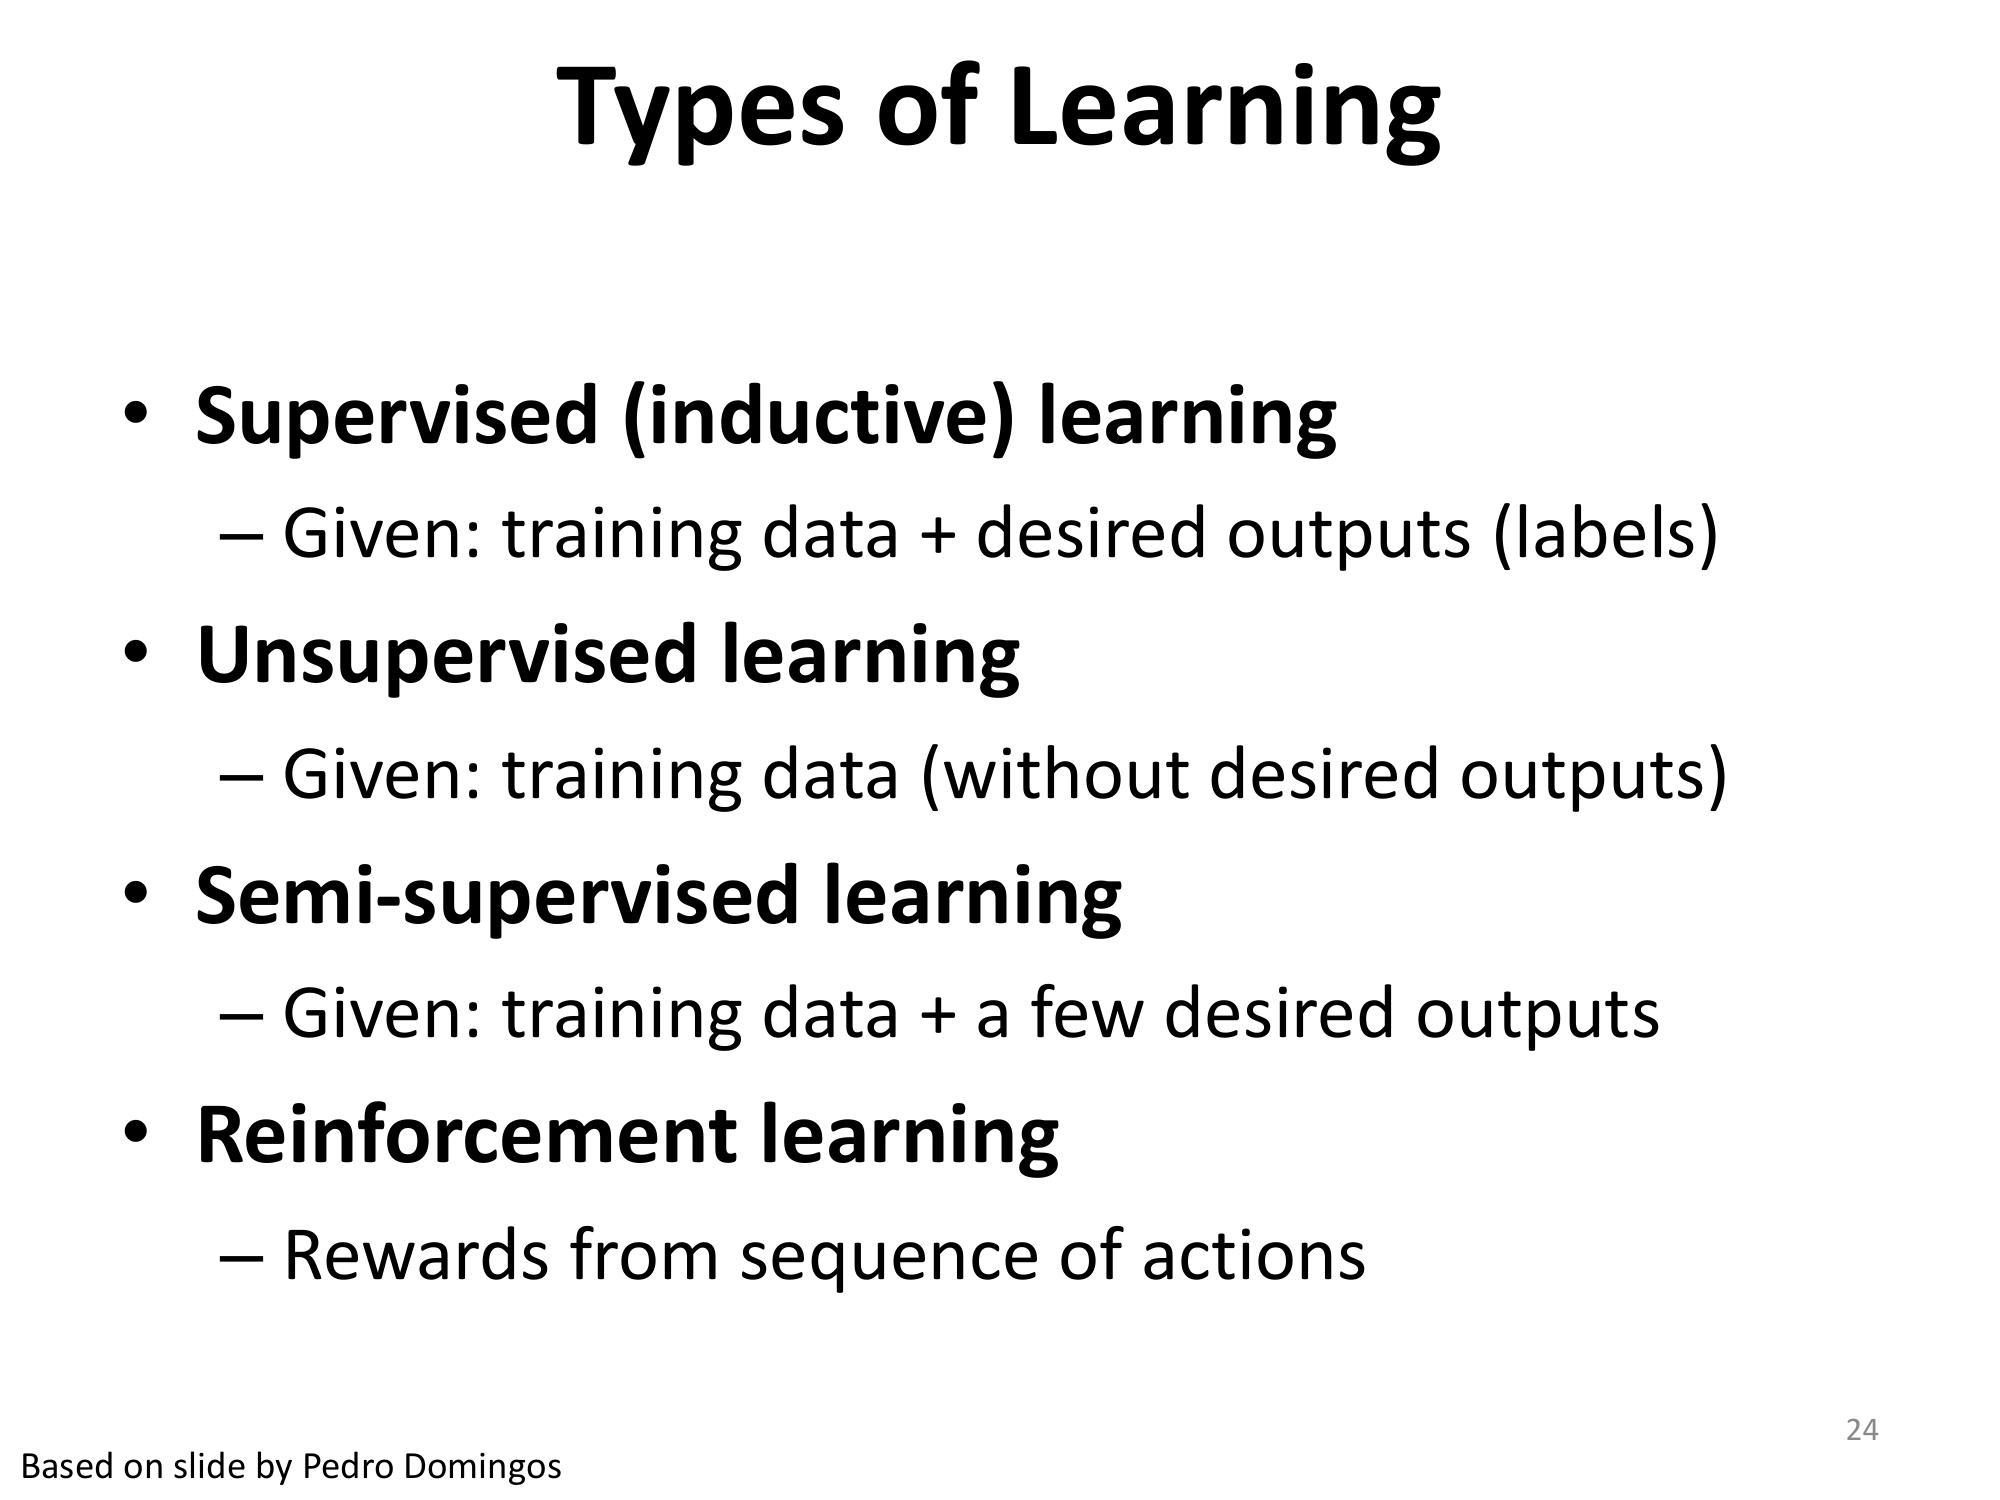


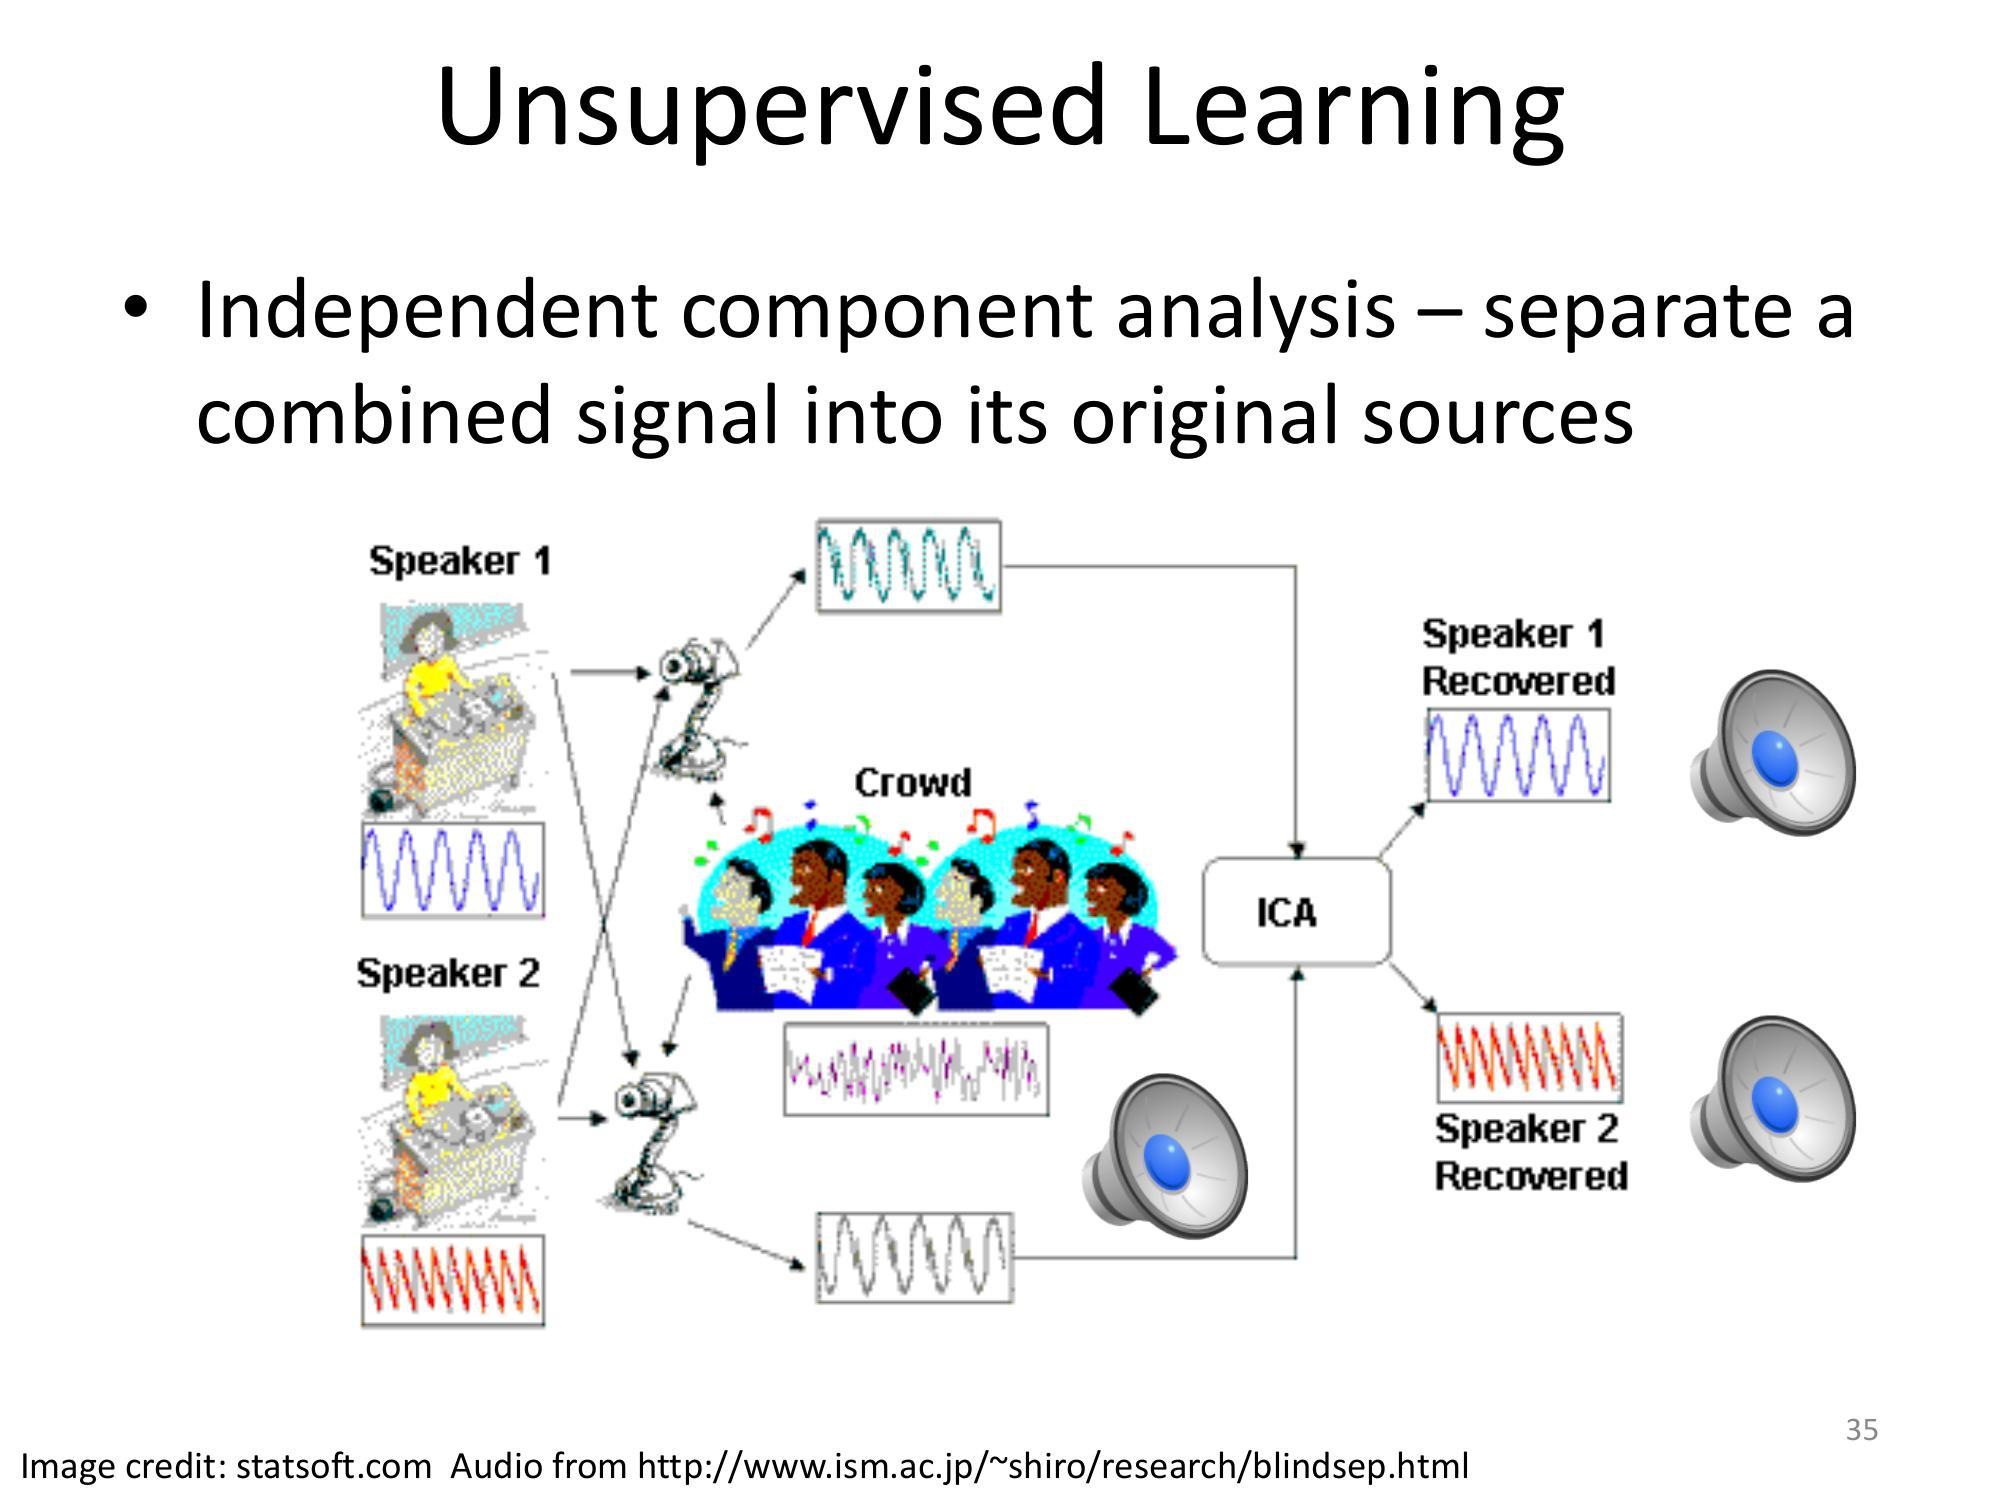


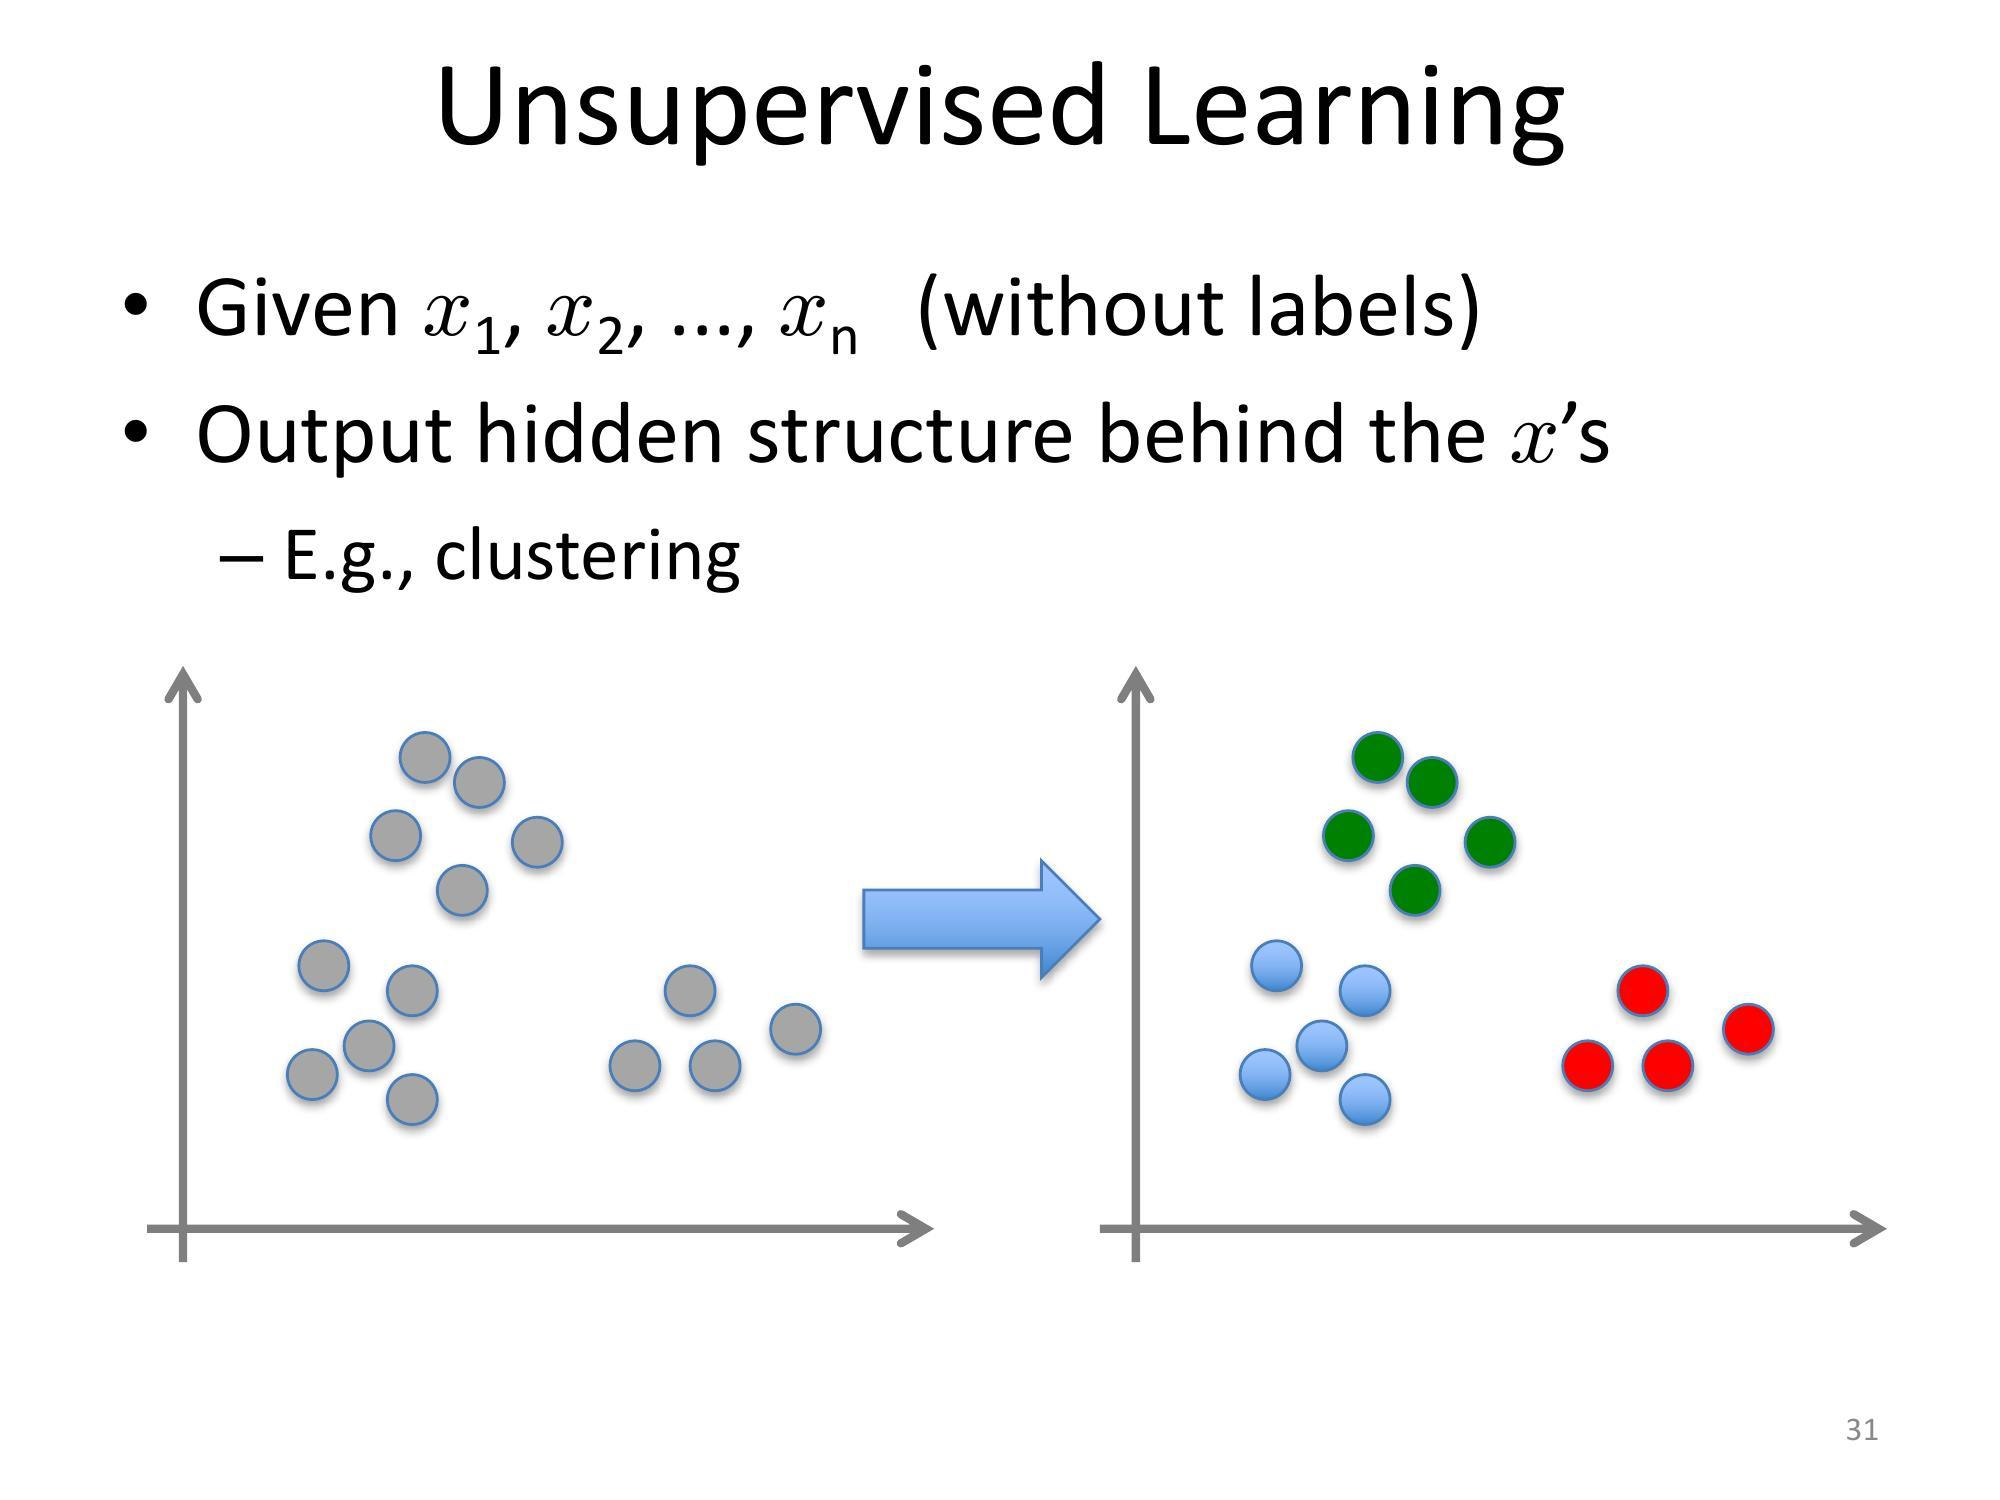

In [9]:
images = list(dict.fromkeys([state2.pages_as_base64_jpeg_images[doc.metadata["page_number"]] for doc in result2["relevant_documents"]]))
for image in images:
    display(HTML(f'<img src="data:image/jpeg;base64,{image}" />'))

In [10]:
%%time
state2 = DocumentRAGState(
    question="Explain automatic speech recognition architecture step by step from the document",
    document_path=path,
    pages_as_base64_jpeg_images=result1["pages_as_base64_jpeg_images"],
    documents=result1["documents"],
)
result2 = agent2.graph.invoke(state2)
result2["response"]
display(Markdown(result2["response"]))

2024-11-28 20:39:57.935 | INFO     | document_ai_agents.document_rag_agent:index_documents:56 - Documents for this file are already indexed, exiting this node
2024-11-28 20:40:02.849 | INFO     | document_ai_agents.document_rag_agent:answer_question:74 - Responding to question Explain automatic speech recognition architecture step by step from the document


Here's a step-by-step explanation of automatic speech recognition (ASR) architecture based on the provided document:

1. **Transduction:** The process begins with a transducer (like a microphone) capturing the audio signal.

2. **Feature Extraction:**  The raw audio waveform is processed to extract relevant features.  The document shows an example of converting the waveform into a spectrogram, which represents the frequencies present in the audio over time.

3. **Neural Network:** This core component processes the extracted features (the spectrogram in this example). The document highlights the use of deep learning (neural networks with many hidden layers) for improved accuracy.  The neural network attempts to predict phone states (basic units of sound) from the input features.

4. **Decoder:** The outputs of the neural network are interpreted by a decoder.  This module translates the predicted phone states into a sequence of words.

5. **Language Model:**  A language model is used to refine the word sequence, making it more grammatically correct and semantically meaningful. It incorporates knowledge of the probability of different word sequences occurring in natural language.

In summary, ASR takes an audio signal, converts it into a meaningful representation (spectrogram), uses a neural network to identify phonetic units, and then combines a decoder and a language model to generate a textual representation of the spoken words.  The document emphasizes that deep learning significantly improves the accuracy of the ASR system compared to previous approaches (like Gaussian Mixture Models, GMM).


CPU times: user 48.4 s, sys: 46.8 ms, total: 48.4 s
Wall time: 8.19 s



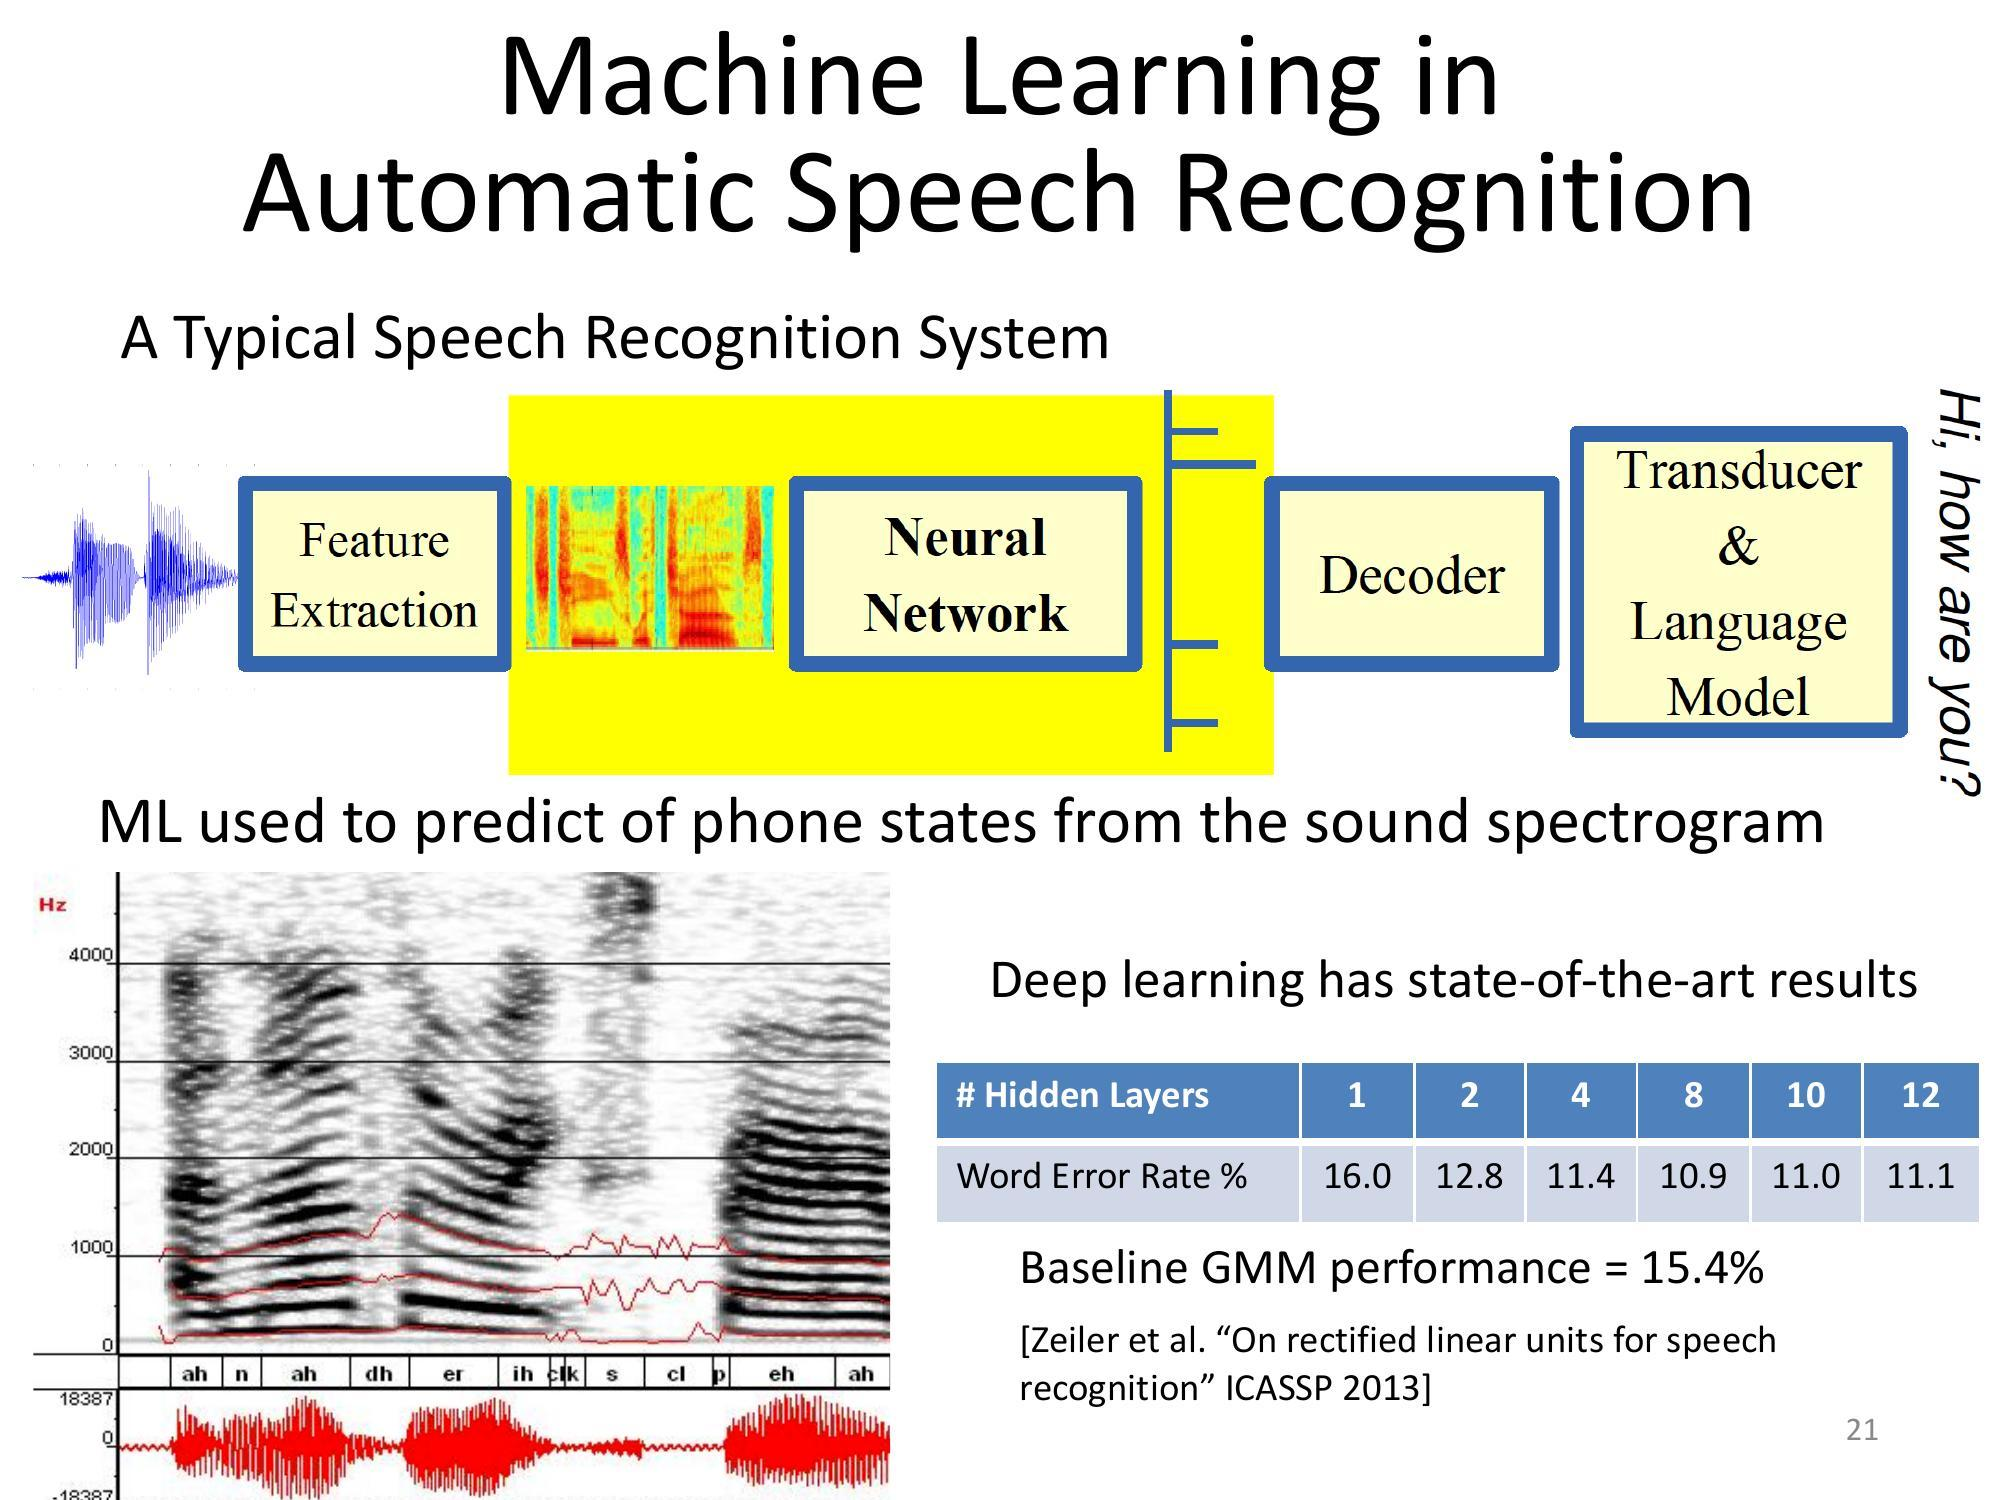

In [11]:
images = list(dict.fromkeys([state2.pages_as_base64_jpeg_images[doc.metadata["page_number"]] for doc in result2["relevant_documents"]]))
for image in images:
    display(HTML(f'<img src="data:image/jpeg;base64,{image}" />'))